#### Películas: Segmentación de contenido

Se busca aplicar técnicas de clustering para segmentar el catálogo de películas y series en función de sus características técnicas, recepción del público, género y distribución regional, con el fin de descubrir patrones latentes que permitan entender mejor la estructura del contenido disponible y facilitar su análisis o recomendación.

Este proyecto de clustering busca segmentar un catálogo de películas y series utilizando variables técnicas, de género, de distribución geográfica y de recepción del público. A través del agrupamiento no supervisado, se pretende identificar patrones latentes en el contenido. A continuación se resumen los principales objetivos e hipótesis exploradas:

- Segmentar contenido según sus características técnicas y de recepción

   - Objetivo: agrupar obras similares en duración, temporadas, puntajes y votos.

   - Hipótesis: obras con alta duración y buenas puntuaciones forman clusters diferenciados de contenido más breve o ligero.

- Detectar perfiles de contenido por género y distribución regional

   - Objetivo: analizar la influencia de los géneros y la disponibilidad por región en la formación de grupos.

   - Hipótesis: ciertos géneros como comedia y animación tienen mayor distribución global, mientras que otros son más localizados.

- Descubrir patrones en la valoración del público

   - Objetivo: explorar agrupamientos basados en popularidad y puntuaciones de usuarios.

   - Hipótesis: existe contenido muy valorado pero poco popular, posiblemente asociado a nichos culturales o baja promoción.

- Identificar clusters atípicos o infrarepresentados

   - Objetivo: encontrar grupos pequeños que no sigan los patrones principales.

   - Hipótesis: documentales, cine europeo o películas con baja distribución pueden formar clusters únicos.

- Simplificar el catálogo para fines de recomendación

   - Objetivo: reducir la complejidad del catálogo agrupando contenido en clusters representativos.

   - Hipótesis: un número reducido de clusters puede capturar la diversidad del catálogo y servir como base para sistemas de recomendación.

A partir de los datos ya analizados para la entrega 3, se toma el dataset trabajo como imput para esta instancia.


#### Importación de librerías

In [77]:
#Importamos librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Importación de datos

In [79]:
#Importación de datos
df = pd.read_csv('https://raw.githubusercontent.com/GabiMiranda05/Proyecto-Ingenias/refs/heads/main/Cuarta-Entrega/datos_procesados.csv')

In [80]:
df.shape

(5283, 133)

In [81]:
pd.set_option('display.max_columns', None)

In [82]:
df.head()

,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,type_enc,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western,AE,AF,AL,AO,AR,AT,AU,BD,BE,BF,BG,BR,BS,BY,CA,CD,CH,CL,CM,CN,CO,CU,CY,CZ,DE,DK,DZ,EG,ES,FI,FO,FR,GB,GE,GH,GL,GR,GT,HK,HR,HU,ID,IE,IL,IN,IO,IQ,IR,IS,IT,JO,JP,KE,KG,KH,KR,KW,LB,LT,LU,Lebanon,MA,MU,MW,MX,MY,MZ,NG,NL,NO,NP,NZ,PE,PH,PK,PL,PR,PS,PT,PY,QA,RO,RS,RU,SA,SE,SG,SK,SN,SU,SY,TH,TN,TR,TW,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW
0,1976,R,113,0.0,8.3,795222.0,27.612,8.2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1975,PG,91,0.0,8.2,530877.0,18.216,7.8,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1979,R,94,0.0,8.0,392419.0,17.505,7.8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1973,R,133,0.0,8.1,391942.0,95.337,7.7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1969,TV-14,30,4.0,8.8,72895.0,12.919,8.3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Preprocesado de datos



Se seleccionarán columnas relevantes para clustering:
 - Se utilizará en primera instancia el algoritmo KMeans que esta basado en distancias por lo que se necesita variables numéricas con signficado para agrupar.
 - Se mantienen las variables continuas: Runtime, seasons, imdb_score, imdb_votes, tmdb_score, tmdb_popularity. Variables binarias: action, comedy, drana y todas las pertenecientes a genero se mantenien.
 - Las variables referidas a regiones se agrupan para simplificar el modelo.

In [83]:
region_map = {
    'Americas': ['AR', 'BR', 'CA', 'CL', 'CO', 'CU', 'GT', 'MX', 'PE', 'PR', 'PY', 'US', 'UY', 'VE','BS','GL','XX'],
    'Europe': ['AL', 'AT', 'BE', 'BG', 'BY', 'CH', 'CZ', 'DE', 'DK', 'ES', 'FI', 'FR', 'GB', 'GE', 'GR', 'HR',
               'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'RU', 'SE', 'SK','CY','FO','SU','UA','VA'],
    'Asia': ['BD', 'CN', 'HK', 'ID', 'IN', 'IQ', 'IR', 'IL', 'JP', 'KH', 'KR', 'KZ', 'MY', 'NP', 'PH', 'PK',
             'SG', 'TH', 'TW', 'VN','AF','IO','KG'],
    'Middle_East': ['AE', 'JO', 'KW', 'LB', 'Lebanon', 'OM', 'QA', 'SA', 'SY','PS','TR'],
    'Africa': ['DZ', 'EG', 'GH', 'KE', 'MA', 'MU', 'MW', 'MZ', 'NG', 'SN', 'TZ', 'ZA', 'ZW','AO','BF','CD','CM','TN'],
    'Oceania': ['AU', 'NZ'],
}

In [84]:
# Crear una columna por región sumando los países que pertenecen a esa región
for region, countries in region_map.items():
    existing_countries = [c for c in countries if c in df.columns]
    df[region] = df[existing_countries].sum(axis=1)

    # Convertir a binario: 1 si está disponible en al menos un país de la región
    df[region] = np.where(df[region] > 0, 1, 0)

In [85]:
# Obtener todas las columnas de países que estén en el DataFrame
all_country_columns = [col for region in region_map.values() for col in region if col in df.columns]

# Eliminar del DataFrame
df = df.drop(columns=all_country_columns)

In [86]:
# Se eliminan la columna age_certification con un alto % de registros desconocidos (50%) lo que no aporta de manera clara a la segmentación
df.drop('age_certification', axis=1, inplace=True)

In [87]:
# Lista de columnas que ya venías usando (ejemplo base, ajustá según tu selección real)
variables_continuas = [
    "runtime", "seasons", "imdb_score", "imdb_votes",
    "tmdb_popularity", "tmdb_score", "type_enc"
]

# Todas las columnas menos las continuas y release_year
variables_a_excluir = variables_continuas + ["release_year"]

# Variables binarias: todas las que no están en variables_a_excluir
variables_binarias = [col for col in df.columns if col not in variables_a_excluir]

features = variables_continuas + variables_binarias

In [88]:
# Se eliminan las columnas de año ya que el objetivo de la sementacion no incluye la fecha de lanzamiento
df.drop(['release_year'], axis=1, inplace=True)

In [89]:
df.head()

,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,type_enc,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western,Americas,Europe,Asia,Middle_East,Africa,Oceania
0,113,0.0,8.3,795222.0,27.612,8.2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,91,0.0,8.2,530877.0,18.216,7.8,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,94,0.0,8.0,392419.0,17.505,7.8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,133,0.0,8.1,391942.0,95.337,7.7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,30,4.0,8.8,72895.0,12.919,8.3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


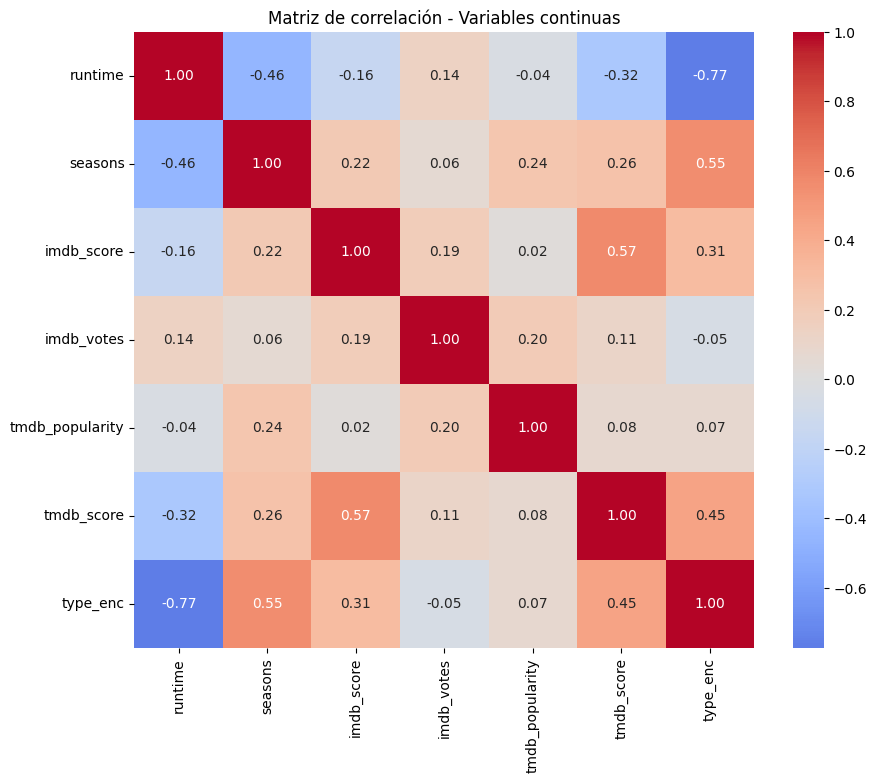

In [90]:
# Crear subset solo con esas columnas
df_continuas = df[variables_continuas]

# Matriz de correlación
corr_matrix = df_continuas.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de correlación - Variables continuas")
plt.show()

La matriz de correlación muestra que no existen relaciones lineales fuertes entre las variables continuas seleccionadas. La mayor correlación observada (0.77) se da entre type_enc y runtime, lo cual es esperable dada la diferencia estructural entre películas y series. Al no detectarse multicolinealidad significativa, se decidió conservar todas las variables para el entrenamiento del modelo.

#### Estandarización

Antes de aplicar KMeans, es fundamental escalar los datos, ya que este algoritmo utiliza distancias euclidianas, y las variables con escalas mayores podrían dominar el agrupamiento.

En este proyecto se utiliza StandardScaler, que transforma cada variable para que tenga media 0 y desviación estándar 1. Esta técnica es preferida frente a otras como MinMaxScaler porque:

- Preserva la forma de la distribución original de los datos.

- Es más robusta ante outliers.

- Es ideal cuando las variables tienen distintas unidades o rangos (por ejemplo, imdb_votes en millones y imdb_score en una escala de 1 a 10).


In [91]:
# Subset del DataFrame solo con variables seleccionadas
X = df[features].copy()

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
X_scaled

array([[ 0.86976178, -0.40998698,  1.52181257, ..., -0.17672493,
        -0.17729364, -0.13238944],
       [ 0.30129713, -0.40998698,  1.4356667 , ..., -0.17672493,
        -0.17729364, -0.13238944],
       [ 0.37881503, -0.40998698,  1.26337495, ..., -0.17672493,
        -0.17729364, -0.13238944],
       ...,
       [ 0.22377922, -0.40998698, -0.02881313, ..., -0.17672493,
         5.64036033, -0.13238944],
       [ 0.94727969, -0.40998698, -0.28725074, ..., -0.17672493,
        -0.17729364, -0.13238944],
       [-0.990668  ,  0.10473764,  1.95254193, ..., -0.17672493,
        -0.17729364, -0.13238944]])

#### Aprendizaje no supervisado: KMeans

Para saber la cantidad óptima de cluster se itera con la siguiente función.

In [93]:
cols_edad = [col for col in df.columns if col.startswith('edad_')]
df = df.drop(columns=cols_edad)

In [94]:
def fit_kmeans_and_score(k,data):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_val = kmeans.inertia_
    silhouette_val = silhouette_score(X_scaled, kmeans.labels_) if k > 1 else None
    return inertia_val,silhouette_val

In [95]:
k_values = range(2,13)

In [96]:
inertia = []
silhouette_scores = []

In [97]:
for k in k_values:
    inertia_val,silhouette_val = fit_kmeans_and_score(k, X_scaled)
    inertia.append(inertia_val)
    silhouette_scores.append(silhouette_val)

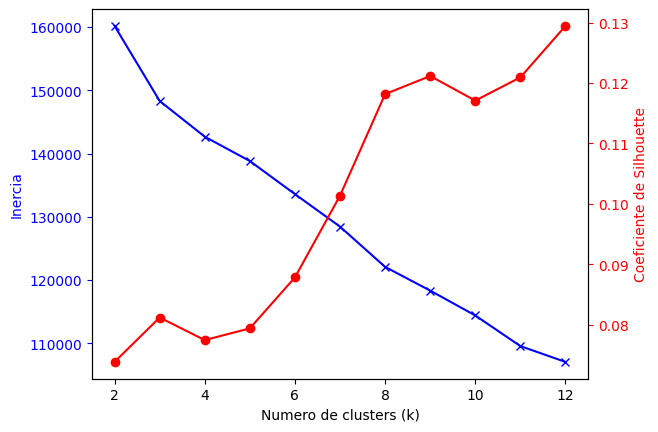

In [98]:
fig, ax1 = plt.subplots()

ax1.plot(k_values, inertia, "bx-", label="Inercia")
ax1.set_xlabel("Numero de clusters (k)")
ax1.set_ylabel("Inercia", color="b")
ax1.tick_params("y", colors="b")

ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores, "ro-", label="Coeficiente de Silhouette")
ax2.set_ylabel("Coeficiente de Silhouette", color="r")
ax2.tick_params("y", colors="r")

plt.show()

Para cada valor de K se tiene el valor de método del codo y en rojo el coeficiente de Sillhouette.

In [99]:
kmeans_8 = KMeans(n_clusters=8, random_state=42).fit(X_scaled)

In [100]:
cluster_labels = kmeans_8.predict(X_scaled)

In [101]:
cluster_labels

array([0, 2, 2, ..., 2, 0, 1], dtype=int32)

In [102]:
df["cluster_8"] = cluster_labels

In [103]:
df[features + ['cluster_8']].head()

,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,type_enc,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western,Americas,Europe,Asia,Middle_East,Africa,Oceania,cluster_8
0,113,0.0,8.3,795222.0,27.612,8.2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,91,0.0,8.2,530877.0,18.216,7.8,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
2,94,0.0,8.0,392419.0,17.505,7.8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
3,133,0.0,8.1,391942.0,95.337,7.7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,30,4.0,8.8,72895.0,12.919,8.3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5


In [104]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reducir a 2 dimensiones para visualizar
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame para graficar
df_plot = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_plot['cluster'] = df['cluster_8']

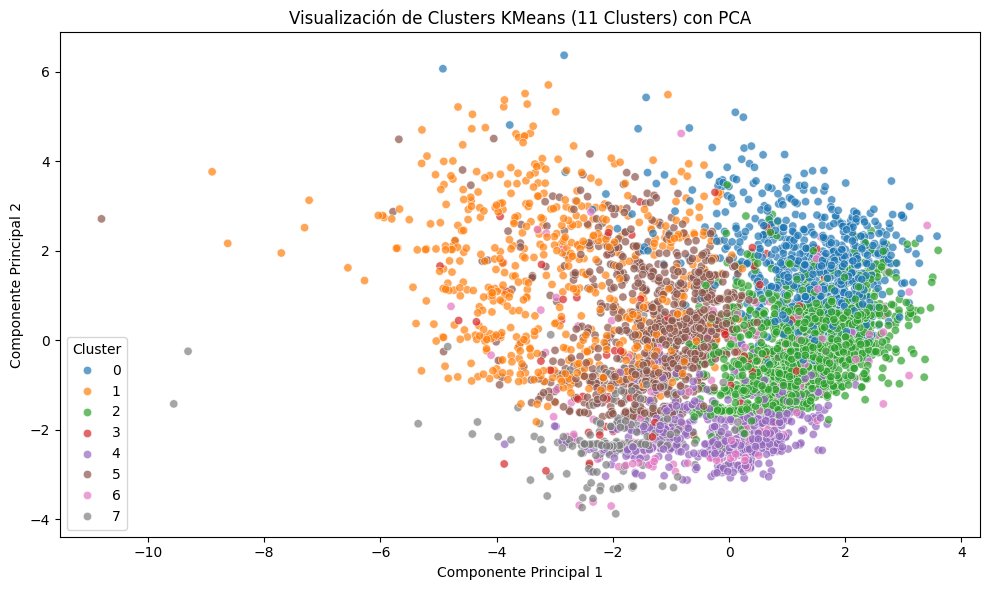

In [105]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='cluster',
    palette='tab10',  # hasta 10 colores, usar 'tab20' si querés más
    data=df_plot,
    legend='full',
    alpha=0.7
)
plt.title("Visualización de Clusters KMeans (11 Clusters) con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [106]:
import pandas as pd
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Cargar los pesos (loadings) de cada feature en las componentes
loadings = pd.Series(pca.components_[0], index=features)
loadings.sort_values(ascending=False)


,0
runtime,0.446078
drama,0.130815
romance,0.114874
thriller,0.111079
Asia,0.092506
Africa,0.092134
crime,0.069272
Middle_East,0.065145
european,0.063068
Europe,0.043673


#### Caracterización

Para catacterizar cada cluster se considera solo los features utilizados para entrenar el modelo. Al obtener cada registro con el cluster correspondiente se describe cada una de las segmentaciones.

In [107]:
promedios_por_cluster = df[features+['cluster_8']].groupby("cluster_8").mean()
promedios_por_cluster

,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,type_enc,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western,Americas,Europe,Asia,Middle_East,Africa,Oceania
cluster_8,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,109.059172,0.087574,6.036213,66098.255621,38.624843,6.250888,0.049704,0.442604,0.010651,0.087574,0.437870,0.011834,0.665089,0.142012,0.011834,0.113609,0.035503,0.279290,0.009467,0.000000,0.063905,0.169231,0.000000,0.894675,0.034320,0.021302,0.505325,0.278107,0.308876,0.011834,0.036686,0.0
1,41.736207,1.884483,6.656724,15461.025862,31.203924,7.362241,0.667241,0.524138,0.905172,0.581034,0.037931,0.012069,0.296552,0.068966,0.582759,0.584483,0.008621,0.087931,0.043103,0.000000,0.075862,0.434483,0.000000,0.096552,0.017241,0.015517,0.512069,0.163793,0.351724,0.003448,0.003448,0.0
2,103.032525,0.013782,6.160970,14630.318082,13.176044,6.352150,0.010474,0.083793,0.018743,0.628997,0.060639,0.003859,0.600331,0.090959,0.076626,0.046307,0.030320,0.014333,0.037486,0.000000,0.320287,0.014884,0.000000,0.018743,0.024256,0.004410,0.421720,0.185777,0.325248,0.058434,0.060088,0.0
3,67.747253,1.241758,6.696703,32497.219780,21.938099,6.990110,0.483516,0.186813,0.109890,0.329670,0.087912,0.186813,0.483516,0.021978,0.285714,0.153846,0.043956,0.087912,0.021978,0.087912,0.120879,0.131868,0.076923,0.186813,0.054945,0.021978,0.197802,0.109890,0.032967,0.000000,0.000000,1.0
4,71.575000,0.457353,7.071618,4596.519118,8.622732,7.036471,0.330882,0.014706,0.007353,0.167647,0.179412,0.998529,0.101471,0.073529,0.020588,0.005882,0.125000,0.002941,0.122059,0.000000,0.016176,0.001471,0.000000,0.025000,0.039706,0.001471,0.733824,0.239706,0.050000,0.019118,0.008824,0.0
5,43.270358,2.135722,7.221716,23097.487514,39.082632,7.590879,0.998914,0.145494,0.022801,0.422367,0.239957,0.008686,0.804560,0.055375,0.060803,0.080347,0.047774,0.038002,0.027144,0.000000,0.225841,0.125950,0.000000,0.250814,0.031488,0.003257,0.404995,0.242128,0.305103,0.028230,0.010858,0.0
6,82.645570,0.753165,6.749367,26508.379747,21.982190,7.007595,0.341772,0.170886,0.082278,0.246835,0.101266,0.348101,0.525316,0.056962,0.101266,0.031646,0.050633,0.000000,0.006329,0.037975,0.113924,0.031646,1.000000,0.113924,0.006329,0.000000,0.569620,0.196203,0.272152,0.018987,0.006329,0.0
7,41.969072,2.608247,6.407216,2185.567010,8.362180,7.246392,0.953608,0.025773,0.005155,0.144330,0.015464,0.164948,0.067010,0.030928,0.020619,0.005155,0.010309,0.025773,0.056701,1.000000,0.077320,0.020619,0.000000,0.030928,0.000000,0.000000,0.675258,0.149485,0.092784,0.000000,0.010309,0.0


In [108]:
conteo_por_cluster = df[features+['cluster_8']].groupby("cluster_8").count()
conteo_por_cluster

,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,type_enc,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western,Americas,Europe,Asia,Middle_East,Africa,Oceania
cluster_8,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845
1,580,580,580,580,580,580,580,580,580,580,580,580,580,580,580,580,580,580,580,580,580,580,580,580,580,580,580,580,580,580,580,580
2,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814
3,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91
4,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680,680
5,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921,921
6,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158,158
7,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194


In [115]:
nuevo_dict = {
    'runtime': 94,
    'seasons': 0,
    'imdb_score': 8.1,
    'imdb_votes': 400000,
    'tmdb_popularity': 20.0,
    'tmdb_score': 7.8,
    'type_enc': 0,
    'action': 0,
    'animation': 0,
    'comedy': 1,
    'crime': 0,
    'documentation': 0,
    'drama': 1,
    'european': 0,
    'family': 0,
    'fantasy': 0,
    'history': 0,
    'horror': 0,
    'music': 0,
    'reality': 0,
    'romance': 0,
    'scifi': 0,
    'sport': 0,
    'thriller': 0,
    'war': 0,
    'western': 0,
    'Americas': 1,
    'Europe': 0,
    'Asia': 0,
    'Middle_East': 0,
    'Africa': 0,
    'Oceania': 0
}

# Convertir dict a DataFrame
nuevo_df = pd.DataFrame([nuevo_dict], columns=features)

# Escalar el nuevo dato
nuevo_scaled = scaler.transform(nuevo_df)

# Predecir cluster
cluster_predicho = kmeans_8.predict(nuevo_scaled)

print(f"El nuevo contenido pertenece al cluster {cluster_predicho[0]}")

El nuevo contenido pertenece al cluster 2


# Conclusión

Se obtuvieron 8 clusters con el algoritmo Kmeans con las siguientes características:

- Cluster 0: Películas europeas de mediana-larga duración (109 min) con fuerte presencia de drama (66%) y thriller, escasa animación o comedia, y una puntuación IMDb media (6.03); representan un cine más serio e introspectivo, popular especialmente en Europa.

- Cluster 1: Series animadas de tipo familiar y fantástico con casi 2 temporadas promedio, alta presencia en América (51%) y géneros como animation (90%), family (58%) y fantasy, ideal para público infantil o general, con buena puntuación (6.65 IMDb) y enfoque de entretenimiento ligero.

- Cluster 2: Películas románticas y dramáticas distribuidas globalmente (Europa, América y Asia), de duración media (103 min), con participación destacada de los géneros drama (60%), romance (32%) y comedia; tienen bajo nivel de votos y popularidad, pero mantienen una buena puntuación IMDb (6.16).

- Cluster 3: Series variadas con duración media (68 min), centradas en drama, crime y thriller, con algo de horror y producción 100% de Oceanía, lo que sugiere una oferta regional con tono serio y narrativas policiales; puntuación alta (6.69 IMDb) y más de una temporada promedio.

- Cluster 4: Documentales (99%) de duración media (71 min), producidos principalmente en América (74%), con muy buena calificación IMDb (7.07) y baja cantidad de temporadas (0.45); representan contenido educativo o informativo puro, con escasa mezcla de géneros.

- Cluster 5: Series cortas (2.1 temporadas) con muy alto puntaje IMDb (7.22), orientadas a drama (80%), romance, y con presencia importante de Europa y Asia; sus historias son profundas y humanas, con buena recepción y enfoque más emocional que comercial.

- Cluster 6: Películas globales de tono diverso, con foco en drama (52%), comedia y algo de horror y thriller, con duración media (82 min), nivel de votación alto (~26k) y producción mayoritariamente americana (57%); tienen una buena puntuación (6.74 IMDb) y abarcan varias emociones y géneros.

- Cluster 7: Reality shows (100%) con más de 2 temporadas, producción principalmente americana (67%), duración corta (~42 min), popularidad baja pero puntuación estable (6.40 IMDb); representan un formato bien definido de entretenimiento televisivo basado en lo real.
